Now that you've learned about random forests and decision trees let's do an exercise in accuracy. You know that random forests are basically a collection of decision trees. But how do the accuracies of the two models compare?

So here's what you should do. Pick a dataset. It could be one you've worked with before or it could be a new one. Then build the best decision tree you can.

Now try to match that with the simplest random forest you can. For our purposes [measure simplicity with runtime](https://stackoverflow.com/questions/1557571/how-do-i-get-time-of-a-python-programs-execution). Compare that to the runtime of the decision tree. This is imperfect but just go with it.

Hopefully out of this you'll see the power of random forests, but also their potential costs. Remember, in the real world you won't necessarily be dealing with thousands of rows. It could be millions, billions, or even more.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import ensemble
from IPython.display import Image
import pydotplus
import graphviz
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# [Data](https://www.kaggle.com/uciml/zoo-animal-classification#zoo.csv)

In [7]:
animals = pd.read_csv('zoo.csv')
#print(animals.info())

In [8]:
X = animals.drop('animal_name',axis=1)
Y = animals['animal_name']
#print(np.array(animals.animal_name))

# Decision Tree

--- 0.0019659996032714844 seconds ---
Training Score: 0.6111111111111112
Testing Score: 0.0


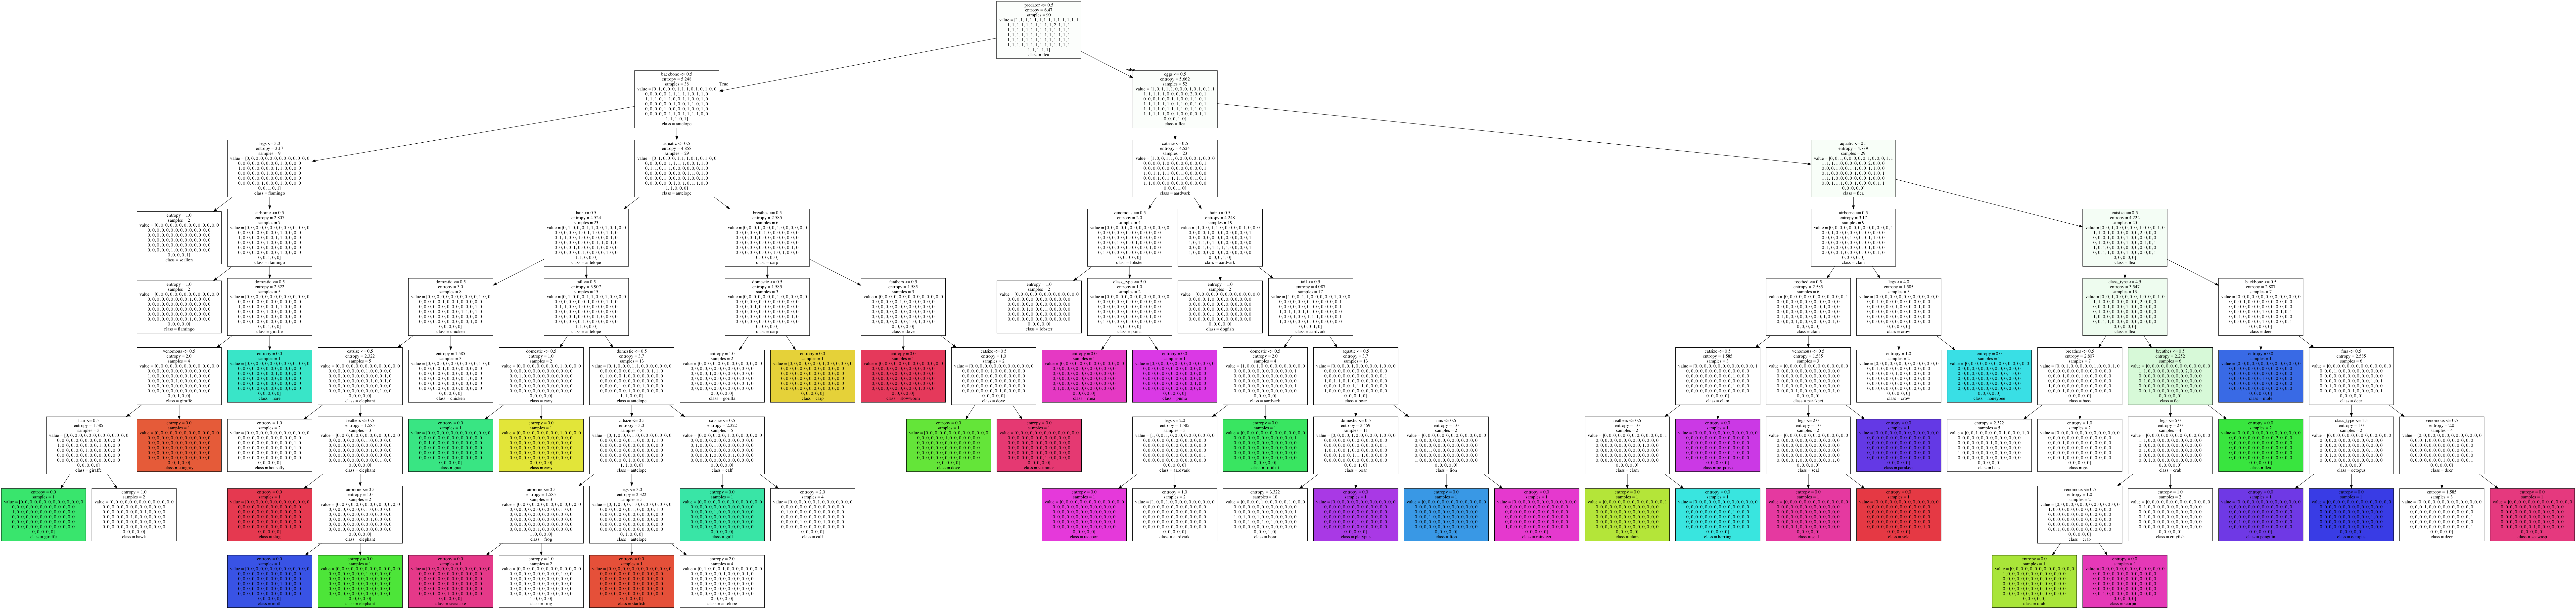

In [47]:
start_time = time.time()

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=8,
    random_state = 1337
)
decision_tree.fit(X, Y)

print("--- %s seconds ---" % (time.time() - start_time))

X_train , X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state=1)
trained = decision_tree.fit(X_train, y_train)
print('Training Score:',trained.score(X_train, y_train))
print('Testing Score:',trained.score(X_test, y_test))
#y_train_pred = decision_tree.predict(X_train)
#print('Prediction R-squared:',r2_score(y_train,y_train_pred))
#print('Cross Validation Score:',cross_val_score(decision_tree, X, Y, cv=2))


# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=np.array(animals.animal_name),
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Random Forests

In [48]:
start_time = time.time()

rfc = ensemble.RandomForestClassifier(n_estimators=15, max_depth=8, max_features=1)
X_train , X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state=1)
trained = rfc.fit(X_train, y_train)
print('Training Score:', trained.score(X_train, y_train))
print('Testing Score:', trained.score(X_test, y_test))

t= round((time.time() - start_time),4)
print("--- %s seconds ---" % t)

Training Score: 0.6111111111111112
Testing Score: 0.0
--- 0.0357 seconds ---


In [45]:
print((t/15),'seconds per tree')

0.0021266666666666665 seconds per tree
